In [1]:
import pandas as pd
import numpy as np

In [208]:
import importlib

In [107]:
import pickle

In [3]:
!pip install ipynb

You should consider upgrading via the 'C:\Users\ПК\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_theme(style="whitegrid")

In [212]:
from sklearn.model_selection import train_test_split

In [7]:
import xgboost

In [8]:
import catboost

In [209]:
from ipynb.fs.full import process_functions as func

In [213]:
importlib.reload(func)

<module 'ipynb.fs.full.process_functions' (D:\Learning\GeekBrains\_Final Project\process_functions.ipynb)>

## Работа с датасетом

In [11]:
df_macro = pd.read_pickle('macroeconomic.pkl')

In [196]:
df = pd.read_csv('project_data/attempt_4/train.csv')

In [13]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [14]:
df.shape

(30471, 292)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [16]:
empty_fields = df.isna().sum()
empty_fields

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [17]:
empty_fields = pd.DataFrame(empty_fields, columns=['number'])
empty_fields.head()

,number
id,0
timestamp,0
full_sq,0
life_sq,6383
floor,167


In [18]:
empty_fields = empty_fields[empty_fields['number']>0]
empty_fields.shape

(51, 1)

In [19]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [20]:
dataset_columns = df.columns

разобъем датасет на категориальные и цифровые признаки

In [21]:
cat_features = df.select_dtypes(include=['object']).columns

In [22]:
cat_features

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [23]:
df_cat = df[['id', *cat_features.to_list()]]

In [24]:
df_cat.head()

,id,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,1,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,3,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,4,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,5,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent


Разобъем колонки на несколько групп.  
Категориальные и числовые признаки будут обрабатываться отдельно по разным правилам.  
так же отдельной группой будут выделены признаки, которые могут иметь только дискретные значения.

In [180]:
num_columns_main = ['full_sq','life_sq', 'floor', 'max_floor', 'num_room', 'kitch_sq' ]

In [170]:
num_columns_extra = ['full_all' 'male_f' 'female_f', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 
                     'children_preschool', 'preschool_quota', 'preschool_education_centers_raion',  'children_school',
                     'school_quota', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 
                     'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 
                     'shopping_centers_raion', 'office_raion',   'young_all',   'young_male',  'young_female'
                     'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all',
                     '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male',
                     '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female',
                     'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame',
                     'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag',
                     'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920',
                     'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995',
                     'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km',
                     'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km',
                     'railroad_station_walk_km', 'railroad_station_walk_min', 'railroad_station_avto_km',
                     'railroad_station_avto_min', 'public_transport_station_km', 'public_transport_station_min_walk',
                     'water_km',  'mkad_km',  'ttk_km',  'sadovoe_km',  'bulvar_ring_km',  'kremlin_km',  'big_road1_km',
                     'big_road2_km',  'railroad_km',   'zd_vokzaly_avto_km',  'bus_terminal_avto_km',  'oil_chemistry_km',
                     'nuclear_reactor_km', 'radiation_km',  'power_transmission_line_km',  'thermal_power_plant_km',
                     'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
                     'basketball_km', 'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km', 'university_km',
                     'workplaces_km', 'shopping_centers_km', 'office_km', 'additional_education_km', 'preschool_km',
                     'big_church_km', 'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km',
                     'catering_km',  'green_part_500', 'prom_part_500', 'office_count_500', 'office_sqm_500',
                     'trc_count_500', 'trc_sqm_500', 'cafe_count_500', 'cafe_sum_500_min_price_avg',
                     'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_count_500_na_price', 'cafe_count_500_price_500',
                     'cafe_count_500_price_1000', 'cafe_count_500_price_1500', 'cafe_count_500_price_2500',
                     'cafe_count_500_price_4000', 'cafe_count_500_price_high', 'big_church_count_500',
                     'church_count_500', 'mosque_count_500', 'leisure_count_500', 'sport_count_500', 'market_count_500',
                     'green_part_1000', 'prom_part_1000', 'office_count_1000', 'office_sqm_1000', 'trc_count_1000',
                     'trc_sqm_1000', 'cafe_count_1000', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg',
                     'cafe_avg_price_1000', 'cafe_count_1000_na_price', 'cafe_count_1000_price_500',
                     'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500',
                     'cafe_count_1000_price_4000', 'cafe_count_1000_price_high', 'big_church_count_1000', 'church_count_1000',
                     'mosque_count_1000', 'leisure_count_1000', 'sport_count_1000', 'market_count_1000', 'green_part_1500',
                     'prom_part_1500',  'office_count_1500',  'office_sqm_1500', 'trc_count_1500', 'trc_sqm_1500',
                     'cafe_count_1500', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500',
                     'cafe_count_1500_na_price', 'cafe_count_1500_price_500', 'cafe_count_1500_price_1000',
                     'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500', 'cafe_count_1500_price_4000',
                     'cafe_count_1500_price_high', 'big_church_count_1500', 'church_count_1500', 'mosque_count_1500',
                     'leisure_count_1500', 'sport_count_1500', 'market_count_1500', 'green_part_2000', 'prom_part_2000',
                     'office_count_2000', 'office_sqm_2000', 'trc_count_2000', 'trc_sqm_2000', 'cafe_count_2000',
                     'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000',
                     'cafe_count_2000_na_price', 'cafe_count_2000_price_500', 'cafe_count_2000_price_1000',
                     'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000',
                     'cafe_count_2000_price_high', 'big_church_count_2000', 'church_count_2000', 'mosque_count_2000',
                     'leisure_count_2000', 'sport_count_2000', 'market_count_2000', 'green_part_3000', 'prom_part_3000',
                     'office_count_3000', 'office_sqm_3000', 'trc_count_3000', 'trc_sqm_3000', 'cafe_count_3000',
                     'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000',
                     'cafe_count_3000_na_price', 'cafe_count_3000_price_500', 'cafe_count_3000_price_1000',
                     'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500', 'cafe_count_3000_price_4000',
                     'cafe_count_3000_price_high', 'big_church_count_3000', 'church_count_3000', 'mosque_count_3000',
                     'leisure_count_3000', 'sport_count_3000', 'market_count_3000', 'green_part_5000', 'prom_part_5000',
                     'office_count_5000', 'office_sqm_5000', 'trc_count_5000', 'trc_sqm_5000', 'cafe_count_5000',
                     'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000',
                     'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000',
                     'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
                     'cafe_count_5000_price_high', 'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
                     'leisure_count_5000', 'sport_count_5000', 'market_count_5000',]

In [173]:
cat_columns_main = ['material', 'build_year',  'state',  'product_type',  'sub_area']

In [174]:
cat_columns_extra = ['preschool_education_centers_raion', 'school_education_centers_top_20_raion', 
                     'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 
                     'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 
                     'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 
                     'ID_metro', 'ID_railroad_station_walk',  'ID_railroad_station_avto',  'ecology', 
                     'water_1line', 'big_road1_1line', ' ID_big_road2', 'railroad_1line']

In [177]:
extra_columns = ['id', 'timestamp', ]

In [178]:
target_variable = ['price_doc']

В случае отсутствия каких-либо полей в дополнительном сете признаковзаполнение NaN величин будет выполнятся при помощи среднего по району  'sub_area'  
Выбросы в дополнительных признаках обрабатываться на предварительном  этапе не будут.  
Выбросы в основных признаках будут обрабатываться - заведомо невозможные величины будут исключены.
Год постройки будет приведен к четырехзначному формату  
Основные категориальные признаки будут обработаны отдельно.  

### Анализ признаков по отдельности для каждого из типов признаков.

#### Анализ числовых признаков

Параллельно с анализом признаков имеет смысл определять выбросы.  
Если соличество значений, которые являются выбросами сравнительно невелико (меньше одного процента от датасета, то имеет смысл удалять такие значения для тренировочного датасета).
По результататм анализа данных будут 

In [181]:
len(num_columns_main)

6

In [183]:
len(num_columns_extra)

253

<AxesSubplot:xlabel='kitch_sq'>

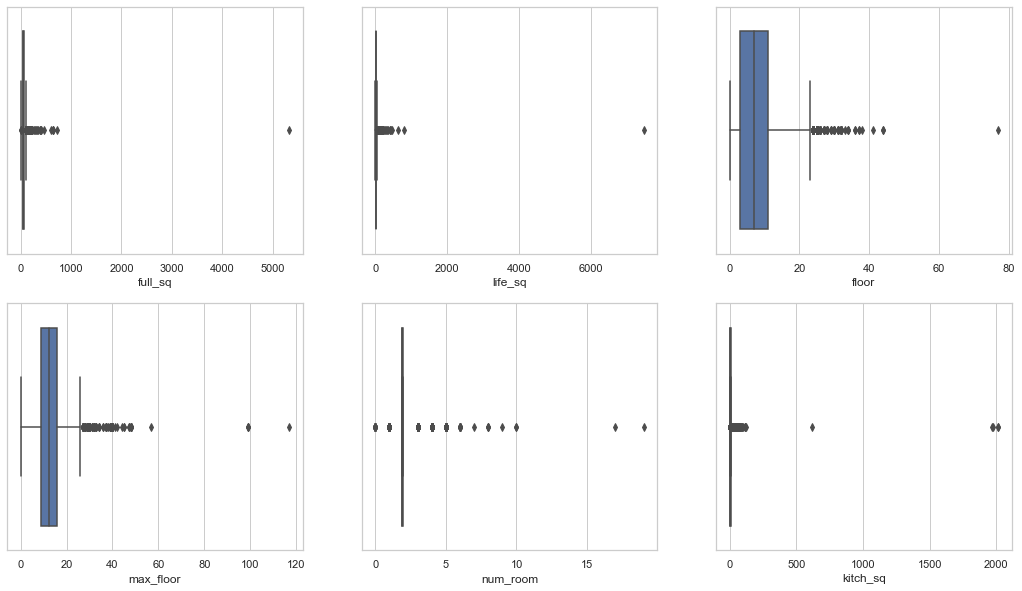

In [186]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='full_sq')   
sns.boxplot(ax=axes[0, 1], data=df, x='life_sq')
sns.boxplot(ax=axes[0, 2], data=df, x='floor')
sns.boxplot(ax=axes[1, 0], data=df, x='max_floor')
sns.boxplot(ax=axes[1, 1], data=df, x='num_room')
sns.boxplot(ax=axes[1, 2], data=df, x='kitch_sq')

<AxesSubplot:>

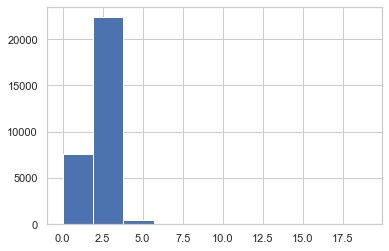

In [187]:
df['num_room'].hist()

In [189]:
df.groupby('sub_area')['price_doc'].mean()

sub_area
Ajeroport            9.888950e+06
Akademicheskoe       1.057576e+07
Alekseevskoe         8.978796e+06
Altuf'evskoe         5.516202e+06
Arbat                1.579480e+07
                         ...     
Vyhino-Zhulebino     6.530211e+06
Zamoskvorech'e       1.621868e+07
Zapadnoe Degunino    5.310923e+06
Zjablikovo           6.644780e+06
Zjuzino              8.244376e+06
Name: price_doc, Length: 146, dtype: float64

In [197]:
df.isna().sum()

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [201]:
df.shape

(30471, 292)

In [202]:
means = {}

In [238]:
def filling_empty_values(df, df_type, means):
    """fill na """
    null_columns = []
    #mean values calculation
    if df_type == 'train':
        for column_name, value in df.isna().sum().items():
            if value > 0:
                null_columns.append(column_name)
        for column_name in null_columns:
            mean_series = df.groupby('sub_area')[column_name].mean()
            means[column_name] = mean_series
    
    for key in means:
        values = means[]
        df[key] = df[key].fillna(df['sub_area'].map(means))
    return df

In [239]:
test_df = filling_empty_values(df, 'train', means )

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

Name: cafe_avg_price_5000, Length: 146, dtype: float64}
{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Ar

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

{'life_sq': sub_area
Ajeroport            34.565574
Akademicheskoe       34.639810
Alekseevskoe         30.281250
Altuf'evskoe         27.926471
Arbat                32.466667
                       ...    
Vyhino-Zhulebino     29.295455
Zamoskvorech'e       44.191489
Zapadnoe Degunino    38.222689
Zjablikovo           28.346457
Zjuzino              29.926641
Name: life_sq, Length: 146, dtype: float64, 'floor': sub_area
Ajeroport            5.512195
Akademicheskoe       7.260664
Alekseevskoe         5.700000
Altuf'evskoe         7.338235
Arbat                6.000000
                       ...   
Vyhino-Zhulebino     6.600760
Zamoskvorech'e       5.408163
Zapadnoe Degunino    7.102689
Zjablikovo           7.174603
Zjuzino              7.136187
Name: floor, Length: 146, dtype: float64, 'max_floor': sub_area
Ajeroport             8.144737
Akademicheskoe       13.754839
Alekseevskoe          9.716418
Altuf'evskoe         11.866667
Arbat                 9.250000
                       ... 

In [234]:
test_df.shape

(30471, 292)

In [235]:
df.isna().sum()

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [32]:
num_features[14:26]

Index(['children_preschool', 'preschool_quota',
       'preschool_education_centers_raion', 'children_school', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion'],
      dtype='object')

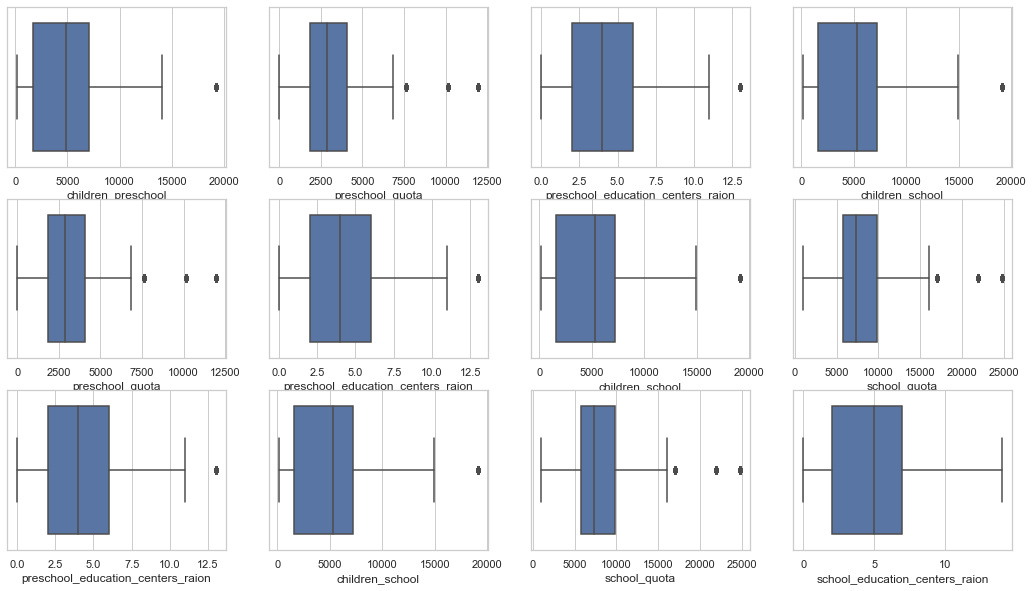

In [33]:
num_list_next = num_features[14:26]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])    

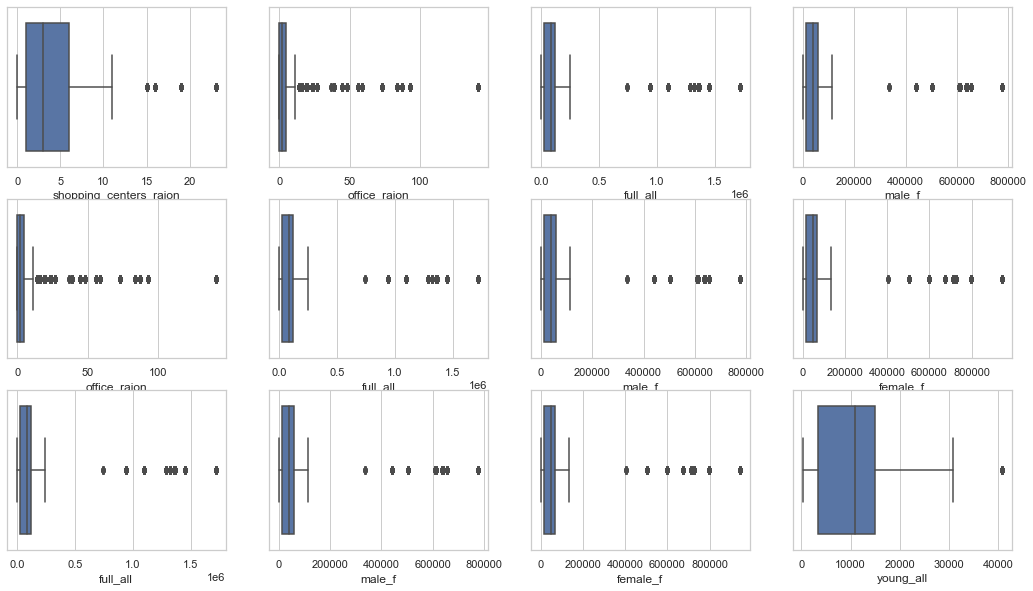

In [34]:
num_list_next = num_features[27:39]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

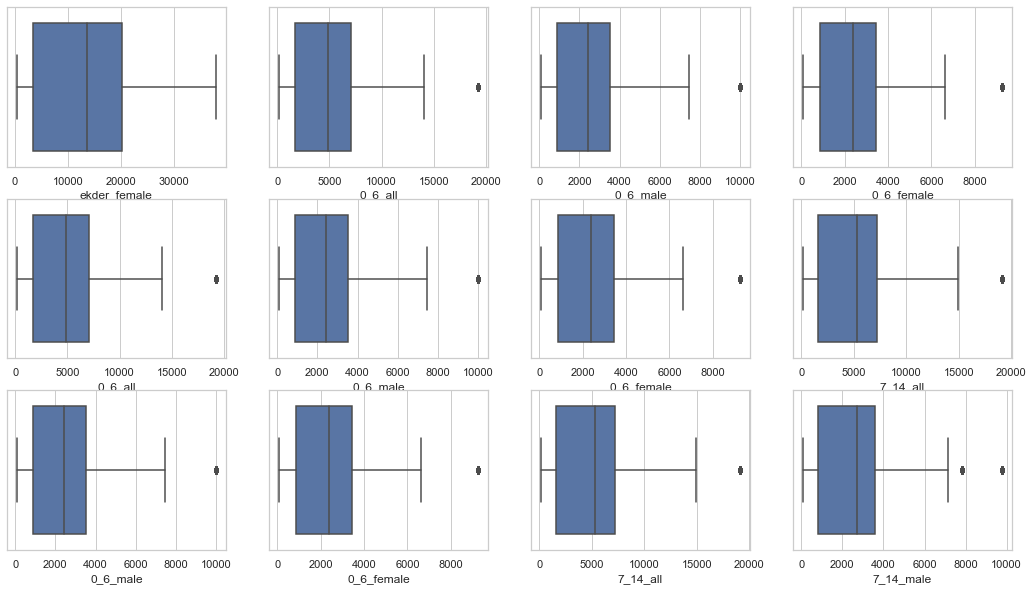

In [35]:
num_list_next = num_features[40:52]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

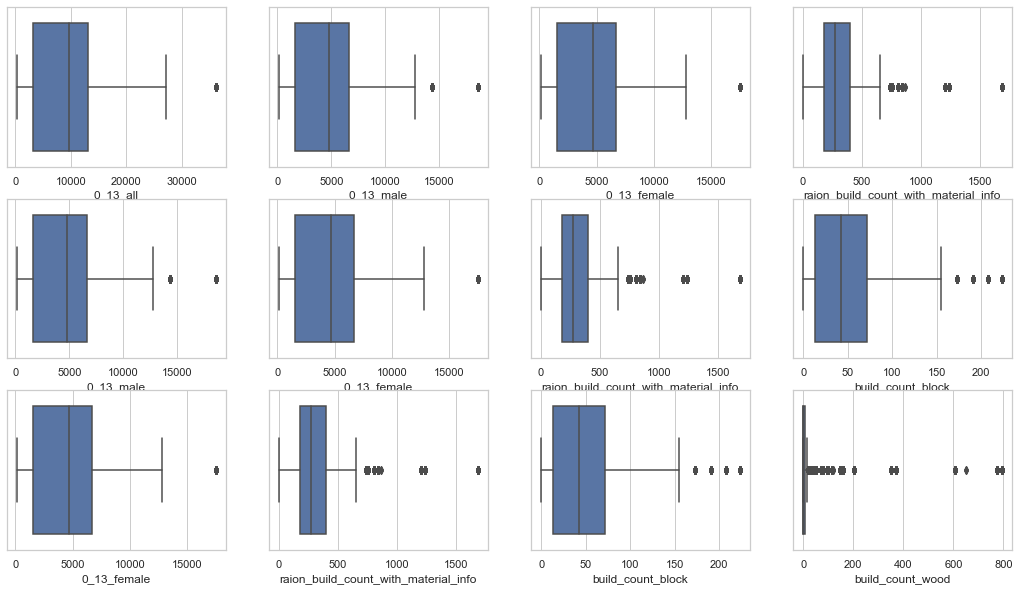

In [36]:
num_list_next = num_features[53:65]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

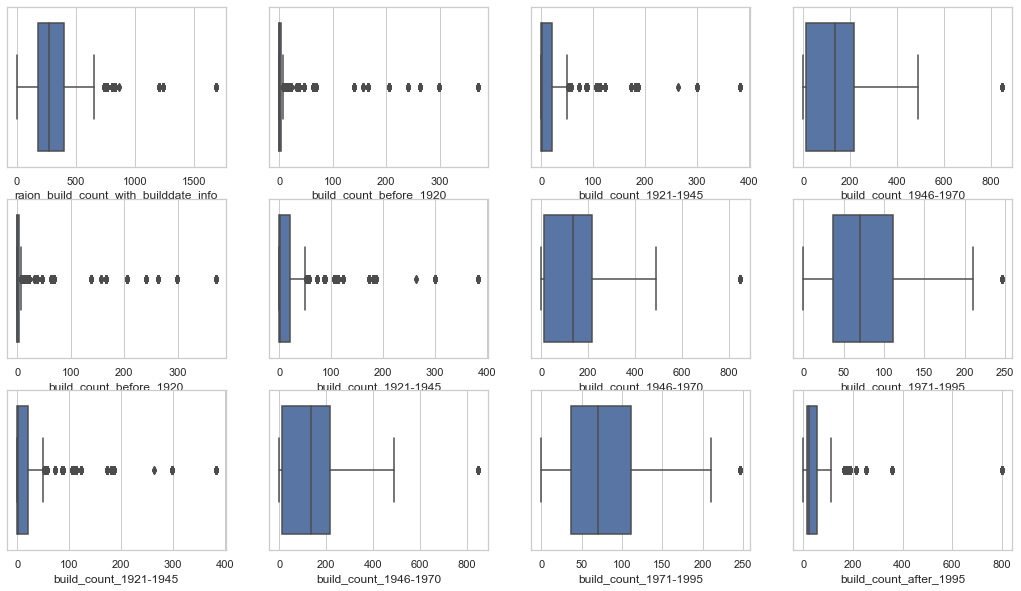

In [37]:
num_list_next = num_features[66:78]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

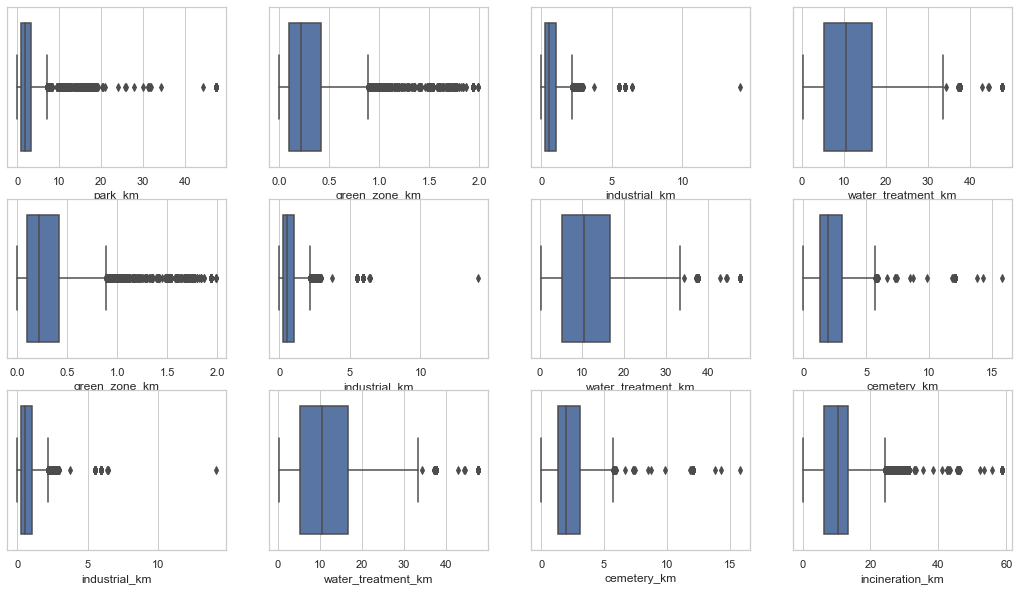

In [38]:
num_list_next = num_features[79:91]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

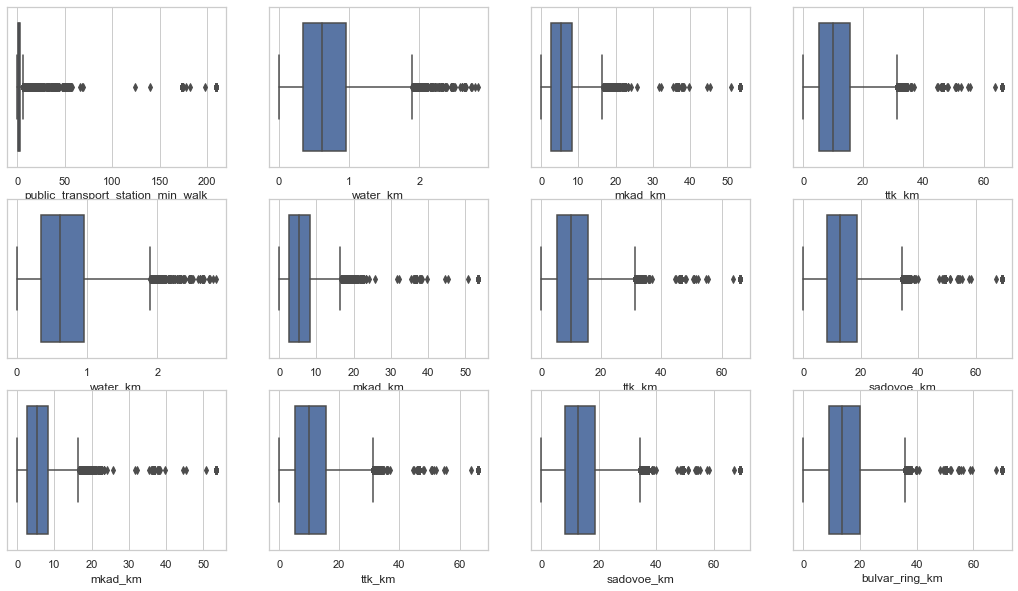

In [39]:
num_list_next = num_features[92:104]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

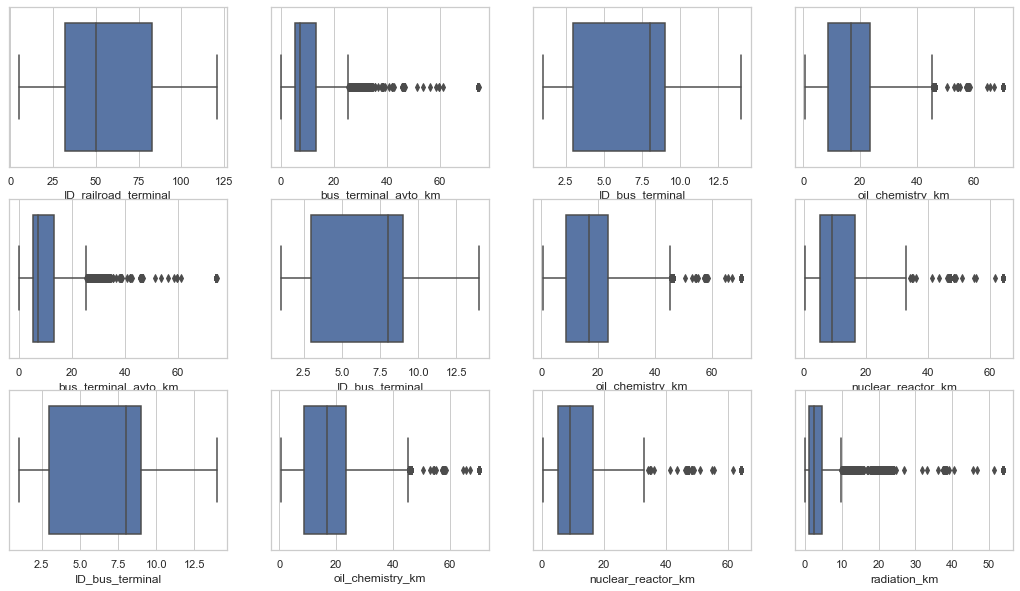

In [40]:
num_list_next = num_features[105:117]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

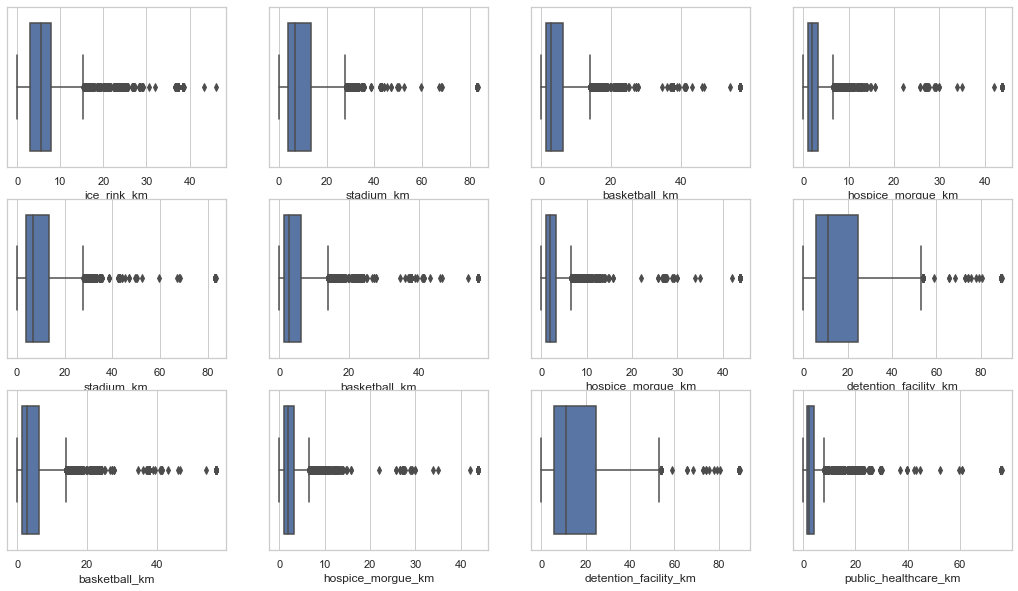

In [41]:
num_list_next = num_features[118:130]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

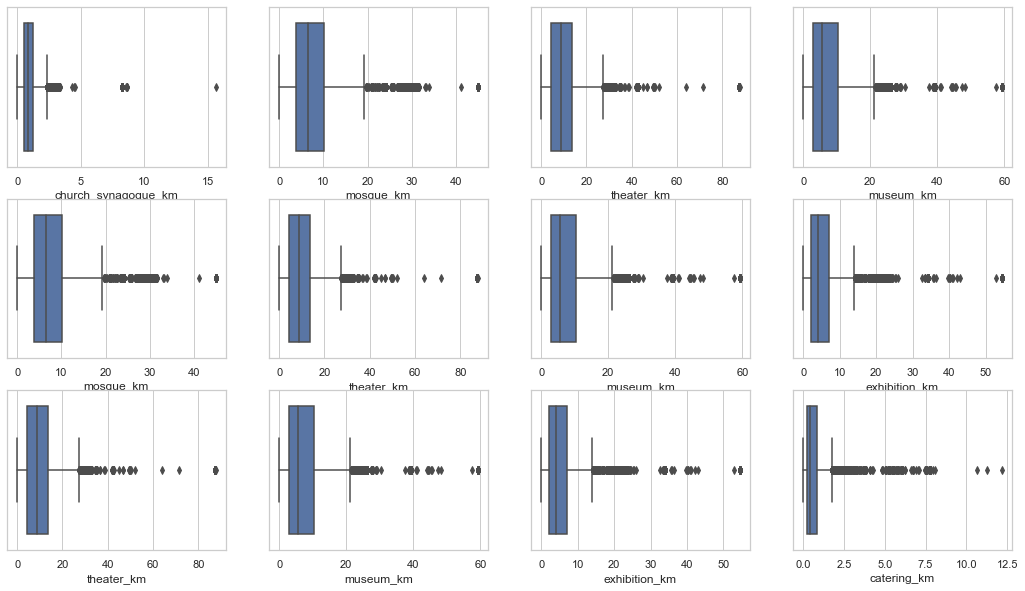

In [42]:
num_list_next = num_features[131:143]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

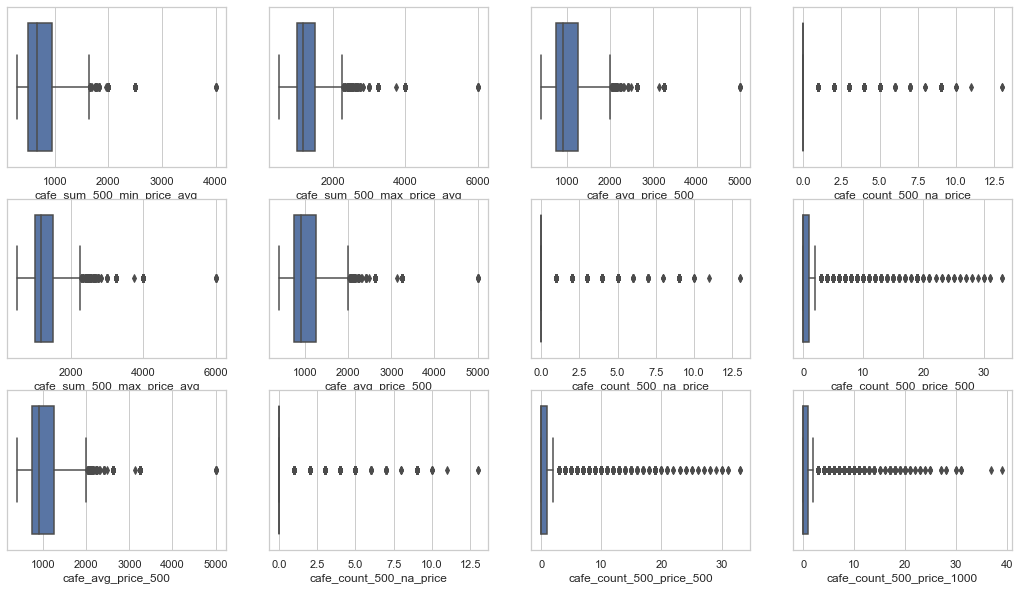

In [43]:
num_list_next = num_features[144:156]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])   

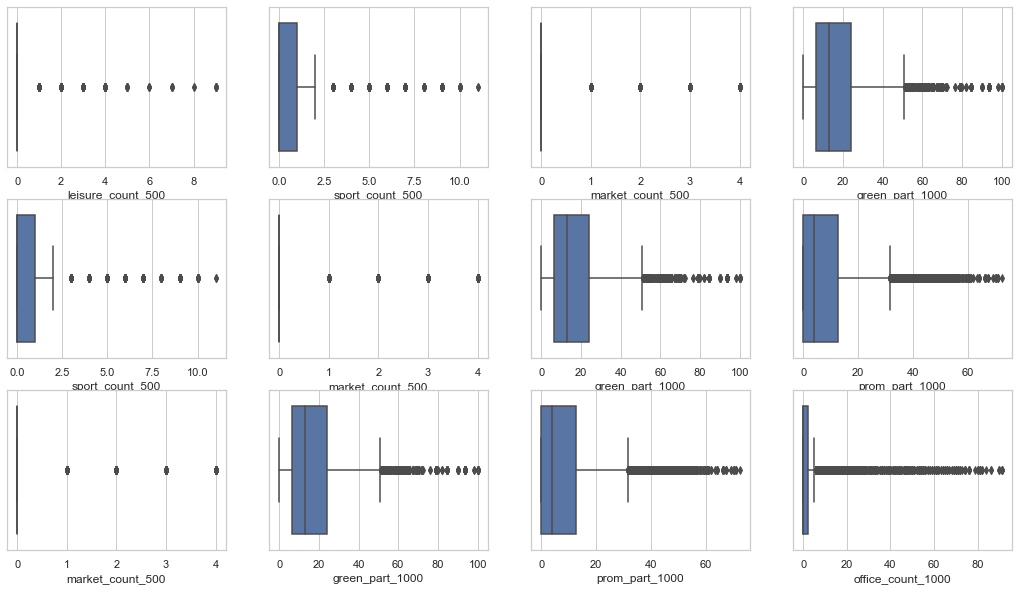

In [44]:
num_list_next = num_features[157:169]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

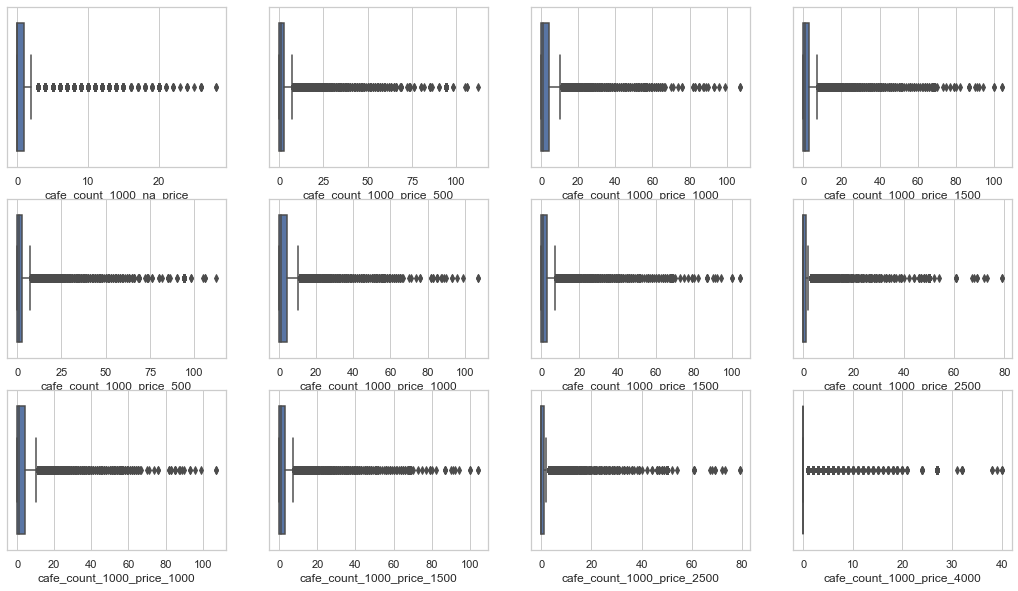

In [45]:
num_list_next = num_features[170:182]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

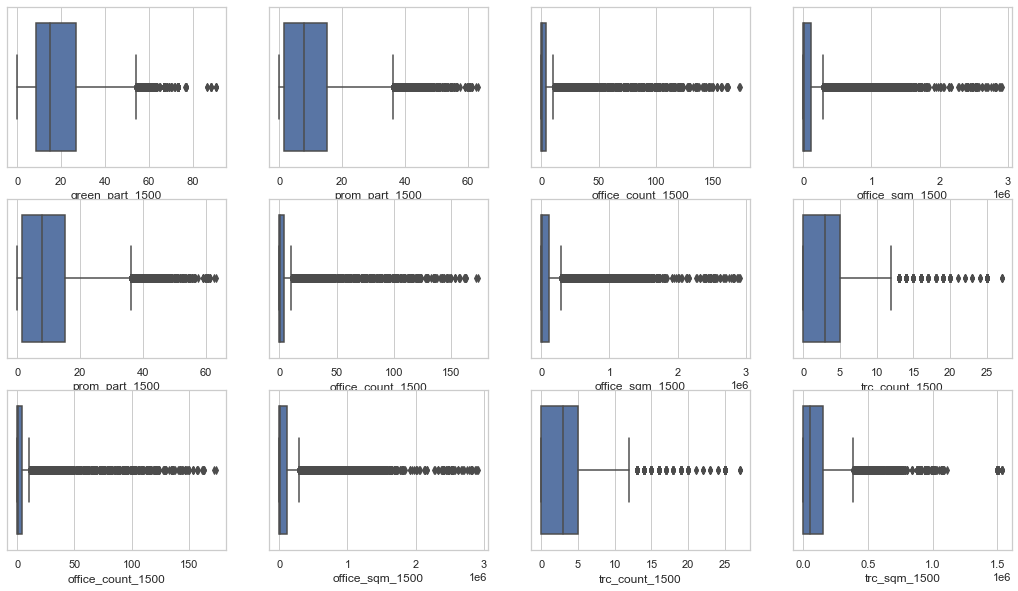

In [46]:
num_list_next = num_features[183:195]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

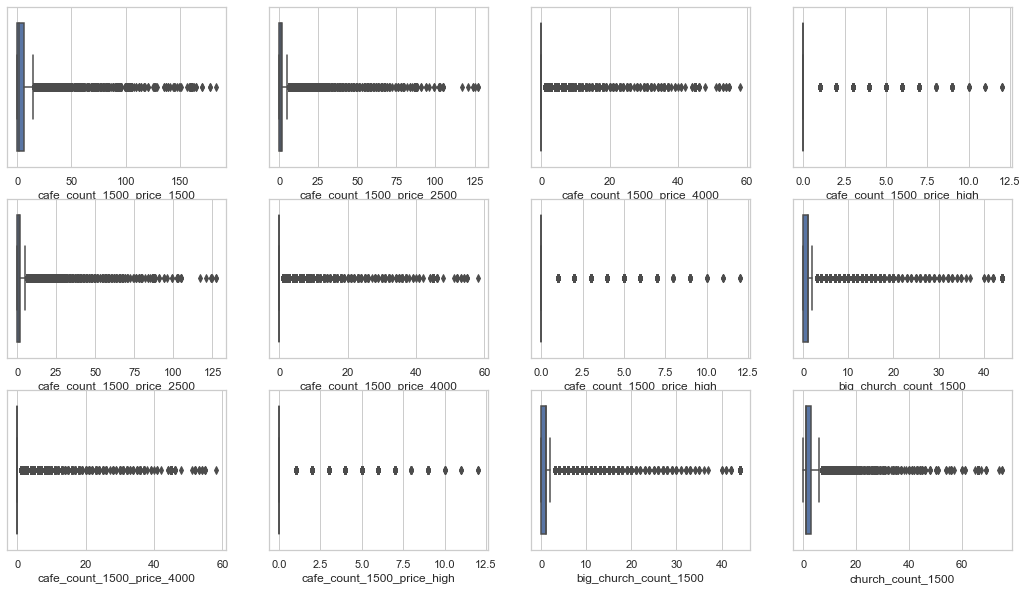

In [47]:
num_list_next = num_features[196:208]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

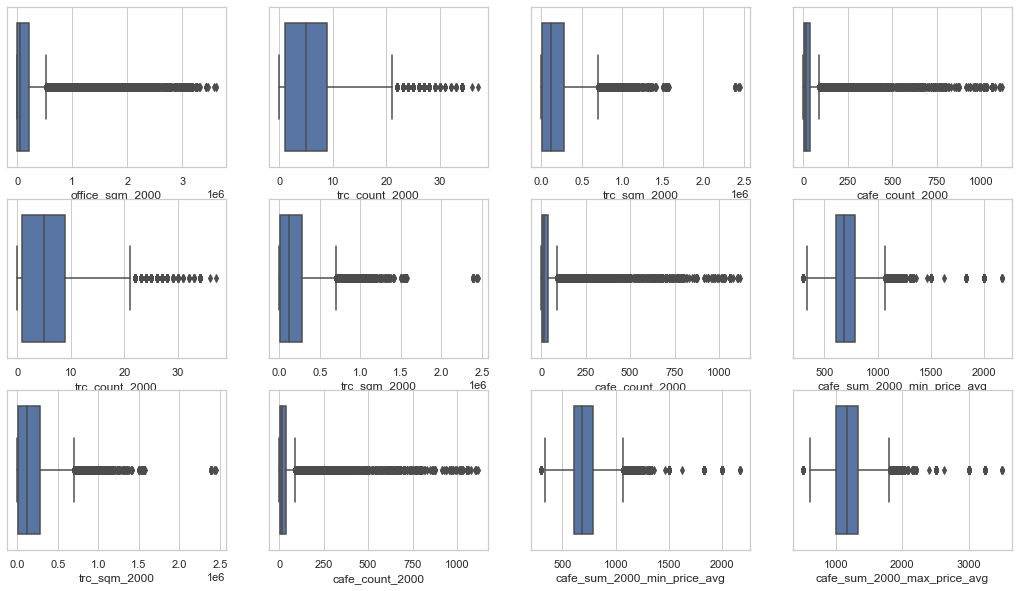

In [48]:
num_list_next = num_features[209:221]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

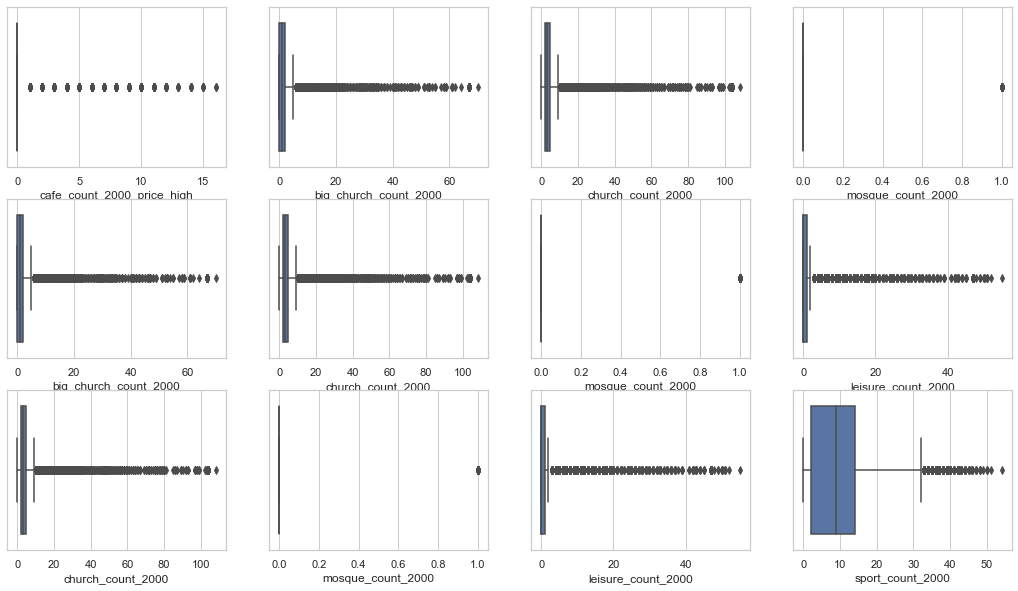

In [49]:
num_list_next = num_features[222:234]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

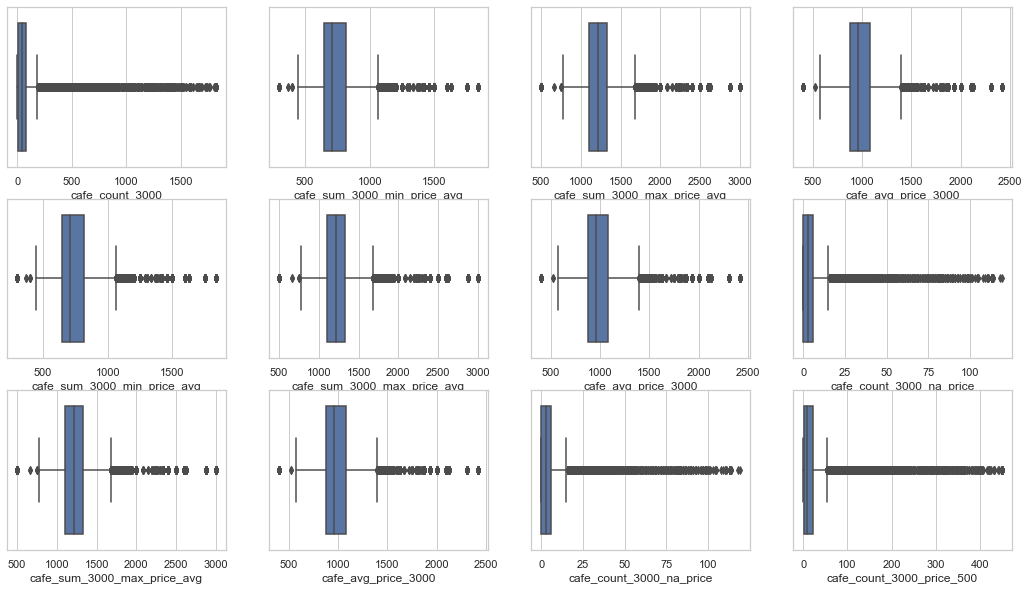

In [50]:
num_list_next = num_features[235:247]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

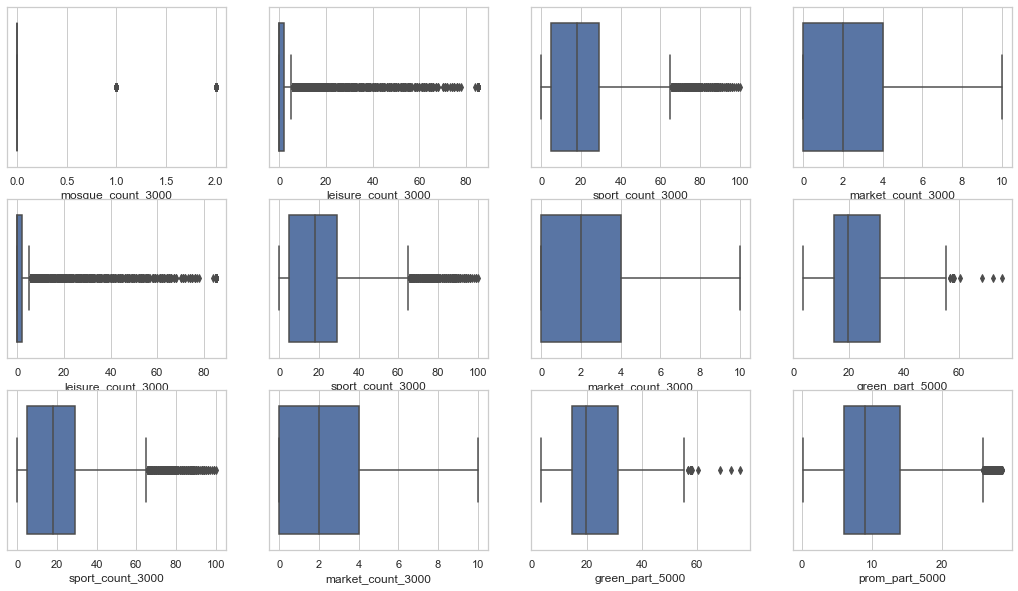

In [51]:
num_list_next = num_features[248:260]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

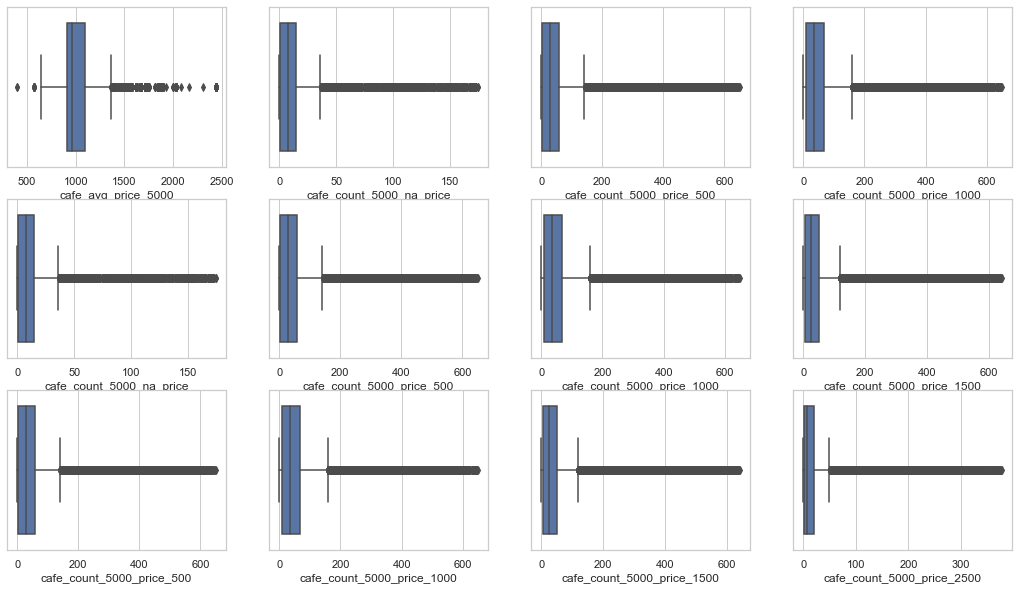

In [52]:
num_list_next = num_features[261:273]
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i in range(3):    
    for j in range (4):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])

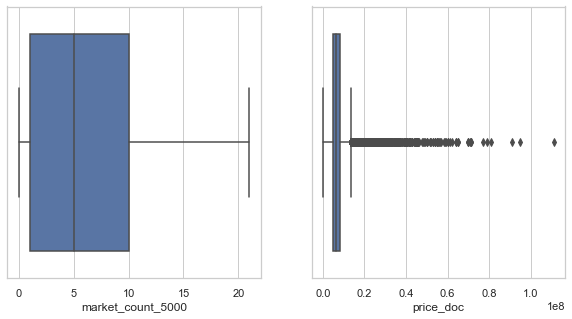

In [53]:
num_list_next = num_features[274:]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
j = 0
for i in range(len(num_list_next)):    
       sns.boxplot(ax=axes[i], data=df, x=num_list_next[i + j])

#### Первичый анализ категориальных признаков

In [54]:
len(cat_features)

16

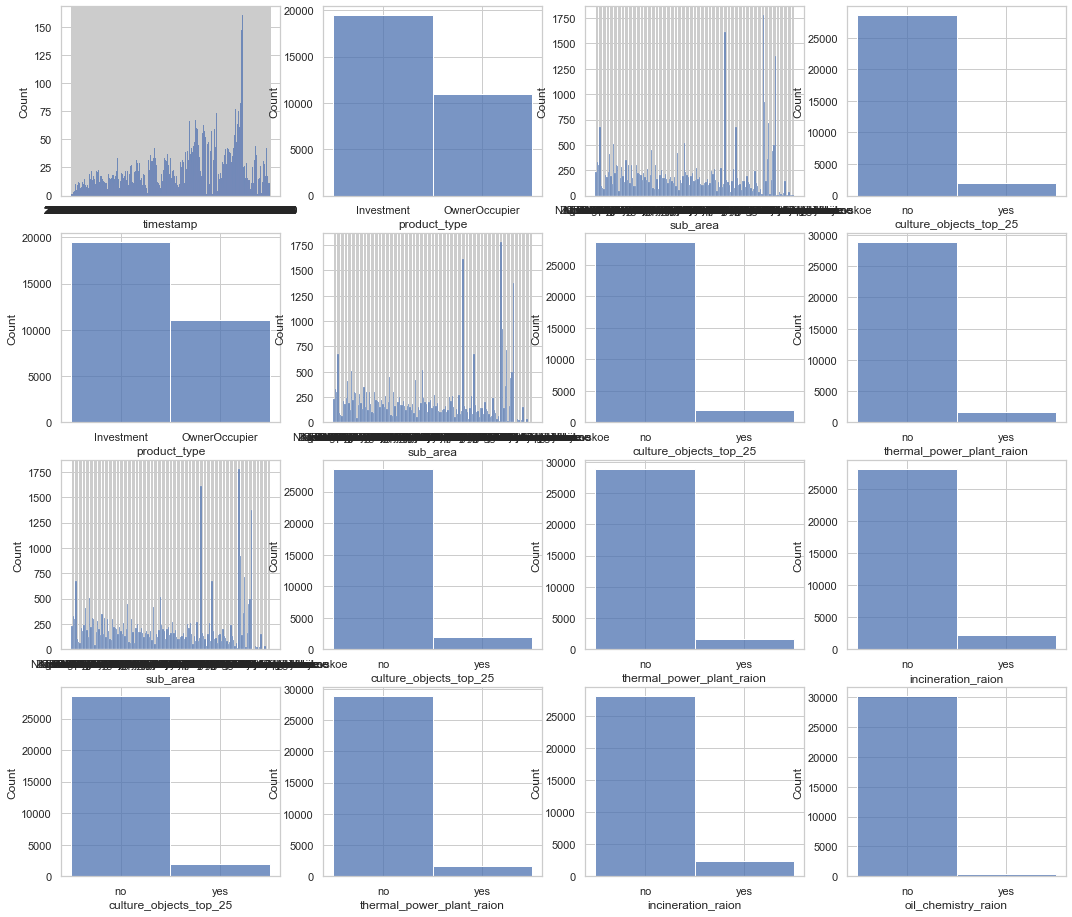

In [55]:
fig, axes = plt.subplots(4, 4, figsize=(18, 16))
for i in range(4):    
    for j in range (4):
       sns.histplot(ax=axes[i, j], data=df, x=cat_features[i + j])

In [56]:
df[cat_features].isna().sum()

timestamp                    0
product_type                 0
sub_area                     0
culture_objects_top_25       0
thermal_power_plant_raion    0
incineration_raion           0
oil_chemistry_raion          0
radiation_raion              0
railroad_terminal_raion      0
big_market_raion             0
nuclear_reactor_raion        0
detention_facility_raion     0
water_1line                  0
big_road1_1line              0
railroad_1line               0
ecology                      0
dtype: int64

In [57]:
df['timestamp'].dtype

dtype('O')

### Анализ целевой переменой

In [119]:
df['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

<AxesSubplot:xlabel='price_doc', ylabel='Count'>

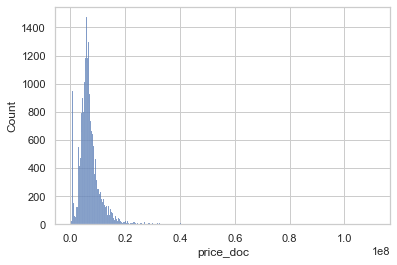

In [120]:
sns.histplot(data=df['price_doc'])

<AxesSubplot:>

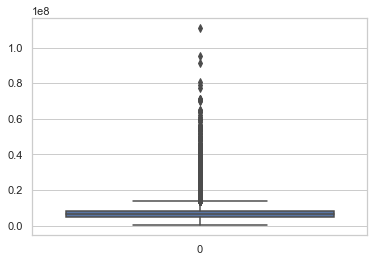

In [121]:
sns.boxplot(data=df['price_doc'])

Рспределение целевой переменной неисимметричное.

### Применение выбраных методов обработки к датасету.

In [58]:
df.shape

(30471, 292)

In [110]:
X, y = func.process(df, 'train')

In [74]:
X.shape

(30471, 291)

In [76]:
y.shape

(30471,)

In [60]:
X.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,1,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,40,9,4,0,13,22,1,0,52,4
1,2,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,36,15,3,0,15,29,1,10,66,14
2,3,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,25,10,3,0,11,27,0,4,67,10
3,4,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,15,11,2,1,4,4,0,0,26,3
4,5,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,552,319,108,17,135,236,2,91,195,14


In [61]:
y.head()

0     5850000
1     6000000
2     5700000
3    13100000
4    16331452
Name: price_doc, dtype: int64

In [62]:
df_date = pd.read_pickle('macroeconomic.pkl')

In [63]:
df_complete = X.merge(df_date, how='left', left_on='timestamp', right_on='timestamp')

In [64]:
df_complete.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,students_state_oneshift,provision_nurse,load_on_doctors,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,seats_theather_rfmin_per_100000_cap,population_reg_sports_share,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
1,2,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
2,3,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
3,4,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,30.63,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
4,5,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,...,30.63,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0


In [65]:
df_complete.shape

(30471, 339)

In [66]:
df_complete.isna().sum()

id                                     0
timestamp                              0
full_sq                                0
life_sq                                0
floor                                  0
                                      ..
hospital_beds_available_per_cap        0
hospital_bed_occupancy_per_year        0
seats_theather_rfmin_per_100000_cap    0
population_reg_sports_share            0
apartment_fund_sqm                     0
Length: 339, dtype: int64

In [ ]:
#X_train, X_valid, y_train, y_valid = train_test_split(df_complete, y, test_size = 0.33, random_state = 33)

In [111]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 33)

In [112]:
y_train.shape

(20415,)

In [113]:
model = catboost.CatBoostRegressor(iterations = 1000,
                          depth = 6,
                          cat_features = cat_features.to_list())

In [114]:
model.fit(X_train, y_train)

Learning rate set to 0.06594
0:	learn: 4574391.9931737	total: 94.2ms	remaining: 1m 34s
1:	learn: 4422817.7793943	total: 162ms	remaining: 1m 20s
2:	learn: 4299613.7390951	total: 232ms	remaining: 1m 17s
3:	learn: 4171572.1320285	total: 295ms	remaining: 1m 13s
4:	learn: 4056613.8067174	total: 362ms	remaining: 1m 12s
5:	learn: 3955295.3284969	total: 425ms	remaining: 1m 10s
6:	learn: 3859730.2072700	total: 496ms	remaining: 1m 10s
7:	learn: 3775820.0639630	total: 558ms	remaining: 1m 9s
8:	learn: 3694570.4281398	total: 619ms	remaining: 1m 8s
9:	learn: 3616914.6487816	total: 689ms	remaining: 1m 8s
10:	learn: 3551040.9616825	total: 806ms	remaining: 1m 12s
11:	learn: 3483815.6891444	total: 900ms	remaining: 1m 14s
12:	learn: 3423946.3567150	total: 994ms	remaining: 1m 15s
13:	learn: 3369919.4427632	total: 1.07s	remaining: 1m 15s
14:	learn: 3319581.2506039	total: 1.13s	remaining: 1m 14s
15:	learn: 3275176.5912753	total: 1.2s	remaining: 1m 13s
16:	learn: 3235356.5832164	total: 1.26s	remaining: 1m 13

146:	learn: 2353467.9036634	total: 10.3s	remaining: 59.7s
147:	learn: 2350097.4980921	total: 10.4s	remaining: 59.7s
148:	learn: 2347617.2620683	total: 10.4s	remaining: 59.6s
149:	learn: 2346171.0022133	total: 10.5s	remaining: 59.5s
150:	learn: 2342343.6710806	total: 10.6s	remaining: 59.5s
151:	learn: 2340698.9195338	total: 10.7s	remaining: 59.4s
152:	learn: 2339668.4855149	total: 10.8s	remaining: 59.5s
153:	learn: 2338688.0624697	total: 10.8s	remaining: 59.5s
154:	learn: 2338384.1978766	total: 11s	remaining: 59.8s
155:	learn: 2336172.2177993	total: 11.1s	remaining: 59.9s
156:	learn: 2334515.3833305	total: 11.2s	remaining: 60s
157:	learn: 2331468.5192680	total: 11.3s	remaining: 60s
158:	learn: 2331059.5759577	total: 11.3s	remaining: 60s
159:	learn: 2330168.4866150	total: 11.4s	remaining: 59.9s
160:	learn: 2329985.3840287	total: 11.5s	remaining: 59.7s
161:	learn: 2328371.4583260	total: 11.5s	remaining: 59.6s
162:	learn: 2326589.6653462	total: 11.6s	remaining: 59.5s
163:	learn: 2324108.75

290:	learn: 2142156.1965432	total: 20.2s	remaining: 49.3s
291:	learn: 2140099.8128848	total: 20.3s	remaining: 49.2s
292:	learn: 2138848.1255628	total: 20.3s	remaining: 49.1s
293:	learn: 2138122.1866918	total: 20.4s	remaining: 49s
294:	learn: 2137029.2803841	total: 20.5s	remaining: 49s
295:	learn: 2136330.0789088	total: 20.5s	remaining: 48.9s
296:	learn: 2135039.8101957	total: 20.6s	remaining: 48.8s
297:	learn: 2133527.4325966	total: 20.7s	remaining: 48.7s
298:	learn: 2132847.3124834	total: 20.7s	remaining: 48.6s
299:	learn: 2132138.8069027	total: 20.8s	remaining: 48.5s
300:	learn: 2129996.3611800	total: 20.8s	remaining: 48.4s
301:	learn: 2128153.1380362	total: 20.9s	remaining: 48.3s
302:	learn: 2127831.3980072	total: 21s	remaining: 48.3s
303:	learn: 2126131.4026106	total: 21s	remaining: 48.2s
304:	learn: 2125958.1840870	total: 21.1s	remaining: 48.1s
305:	learn: 2124302.4881158	total: 21.2s	remaining: 48s
306:	learn: 2123520.3256060	total: 21.2s	remaining: 47.9s
307:	learn: 2121238.2745

433:	learn: 2008437.8617162	total: 29.9s	remaining: 39s
434:	learn: 2007822.8557030	total: 30s	remaining: 39s
435:	learn: 2006823.2360077	total: 30.1s	remaining: 38.9s
436:	learn: 2006116.7544909	total: 30.1s	remaining: 38.8s
437:	learn: 2004010.8601564	total: 30.2s	remaining: 38.7s
438:	learn: 2003529.3603833	total: 30.3s	remaining: 38.7s
439:	learn: 2003471.1812228	total: 30.3s	remaining: 38.6s
440:	learn: 2002208.9746236	total: 30.4s	remaining: 38.5s
441:	learn: 2001453.3830918	total: 30.5s	remaining: 38.4s
442:	learn: 2000732.0454605	total: 30.5s	remaining: 38.4s
443:	learn: 1999751.2619554	total: 30.6s	remaining: 38.3s
444:	learn: 1998738.8445613	total: 30.7s	remaining: 38.3s
445:	learn: 1997873.0978599	total: 30.7s	remaining: 38.2s
446:	learn: 1997238.8493938	total: 30.8s	remaining: 38.1s
447:	learn: 1996242.9248086	total: 30.9s	remaining: 38.1s
448:	learn: 1995629.7174275	total: 31s	remaining: 38s
449:	learn: 1994420.0772669	total: 31s	remaining: 37.9s
450:	learn: 1993907.845856

577:	learn: 1906313.6125084	total: 40.1s	remaining: 29.3s
578:	learn: 1906246.6005721	total: 40.1s	remaining: 29.2s
579:	learn: 1905158.8184783	total: 40.2s	remaining: 29.1s
580:	learn: 1905094.9760582	total: 40.3s	remaining: 29s
581:	learn: 1904299.8121648	total: 40.3s	remaining: 29s
582:	learn: 1903568.5396592	total: 40.4s	remaining: 28.9s
583:	learn: 1902850.2333159	total: 40.5s	remaining: 28.8s
584:	learn: 1902061.2196263	total: 40.5s	remaining: 28.7s
585:	learn: 1901666.3619743	total: 40.6s	remaining: 28.7s
586:	learn: 1901044.0526461	total: 40.6s	remaining: 28.6s
587:	learn: 1900231.4554640	total: 40.7s	remaining: 28.5s
588:	learn: 1899539.1038263	total: 40.8s	remaining: 28.4s
589:	learn: 1899088.8740870	total: 40.8s	remaining: 28.4s
590:	learn: 1898914.4537967	total: 40.9s	remaining: 28.3s
591:	learn: 1898781.4355786	total: 41s	remaining: 28.2s
592:	learn: 1898087.6754668	total: 41s	remaining: 28.2s
593:	learn: 1897613.3863623	total: 41.1s	remaining: 28.1s
594:	learn: 1896619.24

721:	learn: 1825484.7909561	total: 51.5s	remaining: 19.8s
722:	learn: 1825373.9639561	total: 51.6s	remaining: 19.8s
723:	learn: 1824972.5697120	total: 51.7s	remaining: 19.7s
724:	learn: 1824096.2055845	total: 51.7s	remaining: 19.6s
725:	learn: 1823870.5972810	total: 51.8s	remaining: 19.6s
726:	learn: 1823608.5768240	total: 51.9s	remaining: 19.5s
727:	learn: 1823463.1890134	total: 52s	remaining: 19.4s
728:	learn: 1822642.8418358	total: 52s	remaining: 19.3s
729:	learn: 1822085.4844892	total: 52.1s	remaining: 19.3s
730:	learn: 1821331.9529943	total: 52.2s	remaining: 19.2s
731:	learn: 1820304.7954895	total: 52.3s	remaining: 19.1s
732:	learn: 1819428.9020895	total: 52.3s	remaining: 19.1s
733:	learn: 1819040.5347948	total: 52.4s	remaining: 19s
734:	learn: 1818575.4939531	total: 52.5s	remaining: 18.9s
735:	learn: 1818046.3781780	total: 52.6s	remaining: 18.9s
736:	learn: 1817600.0465316	total: 52.6s	remaining: 18.8s
737:	learn: 1817428.0183075	total: 52.7s	remaining: 18.7s
738:	learn: 1817052.

865:	learn: 1756077.0925046	total: 1m 2s	remaining: 9.59s
866:	learn: 1755646.2446526	total: 1m 2s	remaining: 9.52s
867:	learn: 1755132.3637095	total: 1m 2s	remaining: 9.45s
868:	learn: 1754964.3660595	total: 1m 2s	remaining: 9.38s
869:	learn: 1754440.0327345	total: 1m 2s	remaining: 9.31s
870:	learn: 1753805.5666634	total: 1m 2s	remaining: 9.24s
871:	learn: 1753156.0565696	total: 1m 2s	remaining: 9.16s
872:	learn: 1752765.9673692	total: 1m 2s	remaining: 9.09s
873:	learn: 1752413.8001036	total: 1m 2s	remaining: 9.02s
874:	learn: 1751976.9964006	total: 1m 2s	remaining: 8.95s
875:	learn: 1751109.5318669	total: 1m 2s	remaining: 8.88s
876:	learn: 1750172.3257388	total: 1m 2s	remaining: 8.81s
877:	learn: 1749578.9503945	total: 1m 2s	remaining: 8.73s
878:	learn: 1749413.1386868	total: 1m 2s	remaining: 8.66s
879:	learn: 1749223.8839470	total: 1m 3s	remaining: 8.59s
880:	learn: 1748604.9086125	total: 1m 3s	remaining: 8.52s
881:	learn: 1748132.1320628	total: 1m 3s	remaining: 8.45s
882:	learn: 17

In [115]:
len(model.feature_importances_)

291

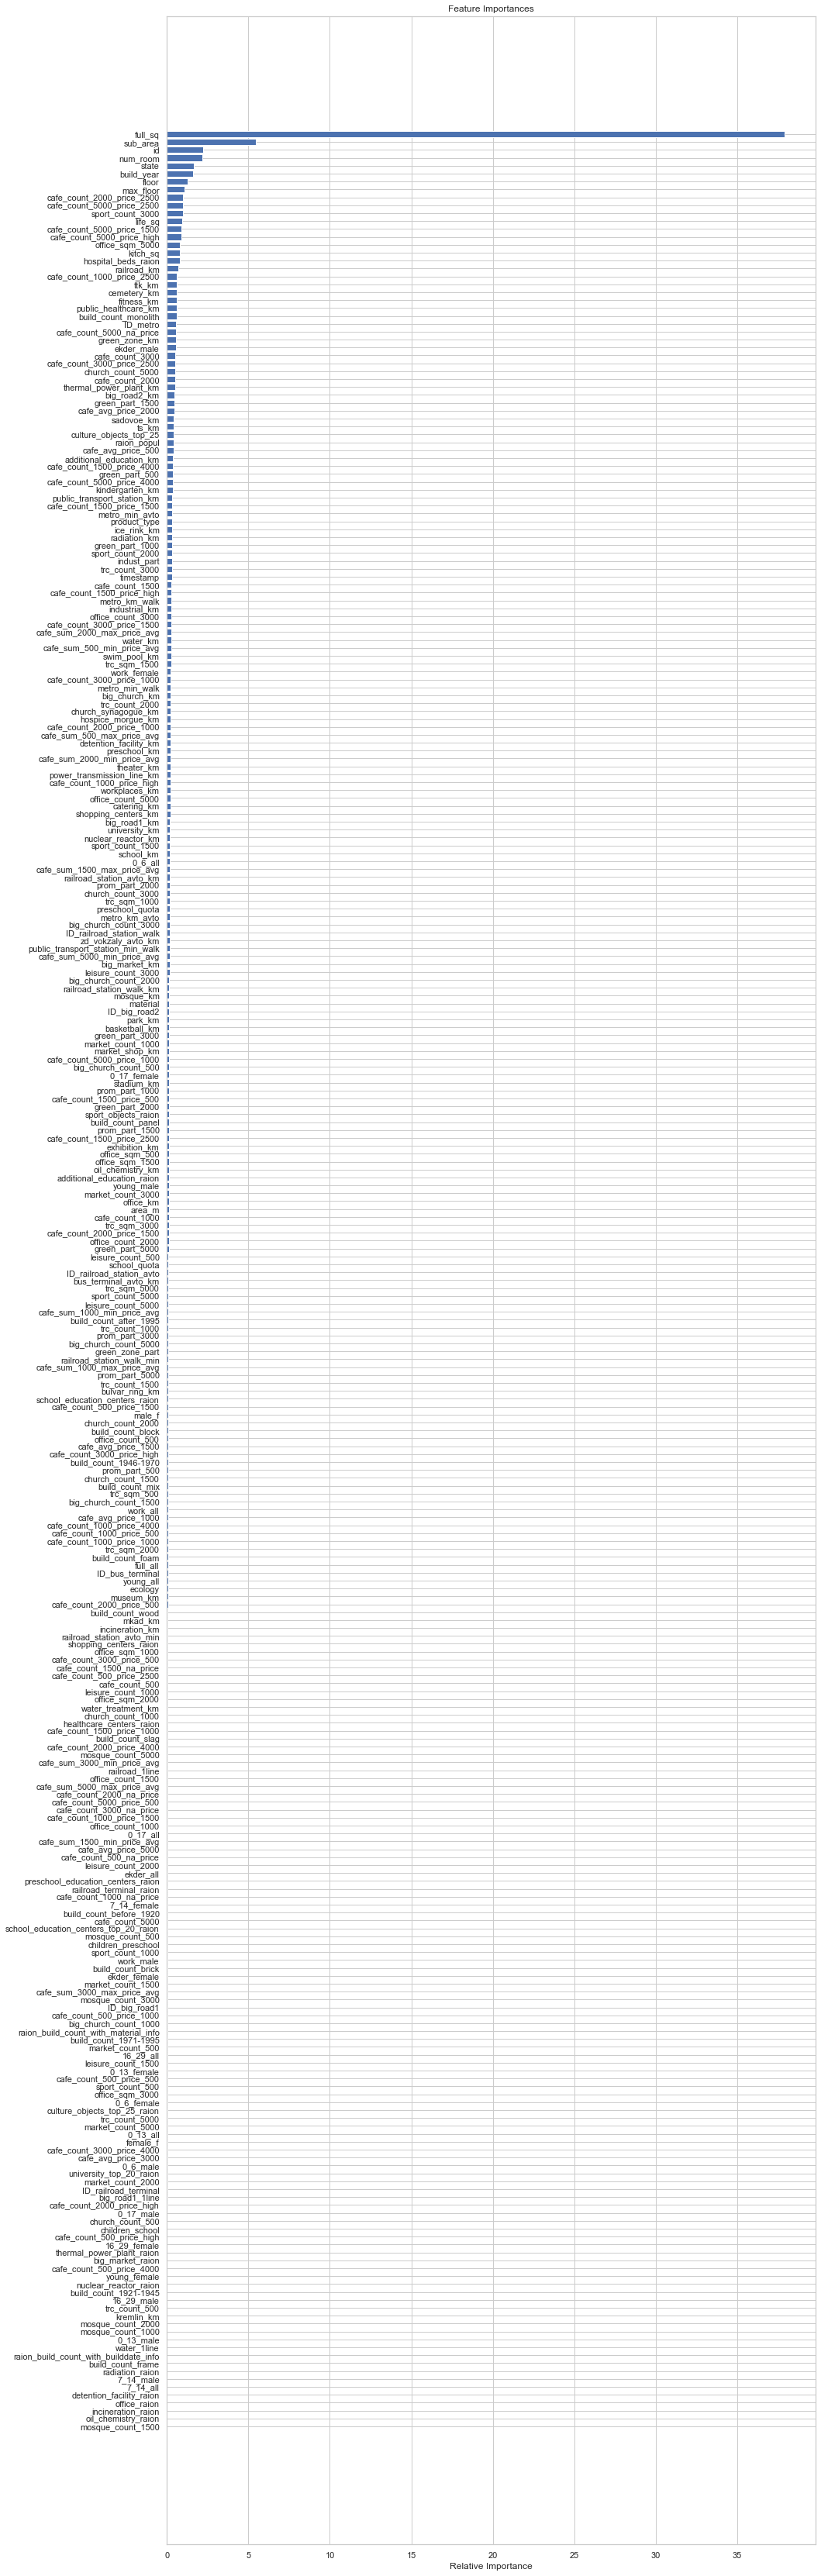

In [116]:

features= X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15,60))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [104]:
importances

array([1.92801392e-01, 7.31535811e-02, 3.50955936e+01, 8.70800146e-01,
       1.39415518e+00, 7.34109379e-01, 3.04277516e-01, 1.79440036e+00,
       2.70721280e+00, 3.14022441e-01, 1.11618268e+00, 1.96576532e-01,
       2.22276157e-01, 2.39419777e-01, 4.20124933e-03, 1.04368942e-01,
       1.14362542e+00, 0.00000000e+00, 3.19270027e-01, 1.09579018e-02,
       1.06979084e-03, 3.67190092e-01, 4.21818178e-03, 1.65689337e-03,
       1.58014658e-01, 3.56950073e-01, 1.74442871e-02, 8.07094794e-03,
       6.85119686e-03, 1.49290178e+00, 4.99439698e-04, 1.56569785e-02,
       1.14992994e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.75075210e-02, 0.00000000e+00,
       0.00000000e+00, 3.05557182e-02, 2.68182421e-02, 0.00000000e+00,
       7.57131853e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.08897081e-02, 0.00000000e+00, 1.16460933e-03, 1.90830596e-01,
       8.73059489e-03, 0.00000000e+00, 0.00000000e+00, 1.67602179e-01,
      

In [117]:
file_name = 'preliminary_trained_model.pkl'

In [118]:
pickle.dump(model, open(file_name, 'wb'))